# PLN project - Data Understanding

This is the first part of the PLN data mining project. In this notebook, you will find the process of data understanding. 

## Import of the needed packages

In [12]:
#All of the needed packages will be imported here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read files
The first step to perform the analysis is to proper read the data files.

In [13]:
arxiv = pd.read_csv('ArXiv-10/arxiv100.csv', sep=",")

Without a further treatment, a problem arises. The dates are being treated as numbers. For this reason, it is needed to do something more complex than the default readers from pandas. 

## Analysis of the dataset

In [14]:
arxiv.head()

,title,abstract,label
0,The Pre-He White Dwarfs in Eclipsing Binaries....,We report the first $BV$ light curves and hi...,astro-ph
1,A Possible Origin of kHZ QPOs in Low-Mass X-ra...,A possible origin of kHz QPOs in low-mass X-...,astro-ph
2,The effects of driving time scales on heating ...,Context. The relative importance of AC and D...,astro-ph
3,A new hard X-ray selected sample of extreme hi...,Extreme high-energy peaked BL Lac objects (E...,astro-ph
4,The baryon cycle of Seven Dwarfs with superbub...,"We present results from a high-resolution, c...",astro-ph


In [15]:
arxiv.describe

<bound method NDFrame.describe of                                                    title  \
0      The Pre-He White Dwarfs in Eclipsing Binaries....   
1      A Possible Origin of kHZ QPOs in Low-Mass X-ra...   
2      The effects of driving time scales on heating ...   
3      A new hard X-ray selected sample of extreme hi...   
4      The baryon cycle of Seven Dwarfs with superbub...   
...                                                  ...   
99995  Semiparametric estimation for space-time max-s...   
99996  A spatial causal analysis of wildland fire-con...   
99997               Neural Conditional Event Time Models   
99998  Efficient Estimation of COM-Poisson Regression...   
99999  algcomparison: Comparing the Performance of Gr...   

                                                abstract     label  
0        We report the first $BV$ light curves and hi...  astro-ph  
1        A possible origin of kHz QPOs in low-mass X-...  astro-ph  
2        Context. The relative importa

<AxesSubplot:xlabel='label', ylabel='count'>

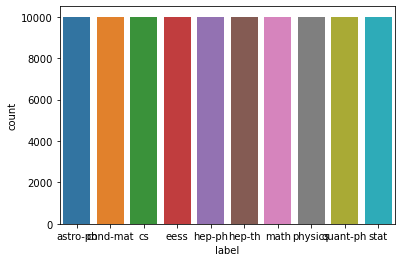

In [16]:
sns.countplot(x = arxiv['label'])

In [17]:
arxiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     100000 non-null  object
 1   abstract  100000 non-null  object
 2   label     100000 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


## Data pre-processing

### Cleanup and normalization

Removing non-alphabetic chars

In [18]:
import re

corpus = []
for i in range(0, arxiv['abstract'].size):
    # get abstracts and remove non alpha chars
    article = re.sub('[^a-zA-Z]', ' ', arxiv['abstract'][i])
    # add article's abstract to corpus
    corpus.append(article)

print(corpus[:3])

['  We report the first  BV  light curves and high resolution spectra of the post mass transfer binary star WASP         to study the absolute properties of extremely low mass white dwarfs  From the observed spectra  the double lined radial velocities were derived  and the effective temperature and rotational velocity of the brighter  more massive primary were found to be  T   rm eff              pm      K and  v   sin  i         pm     km s         respectively  The combined analysis of the   it TESS  archive data and ours yielded the accurate fundamental parameters of the program target  The masses were derived to about        accuracy and the radii to         or better  The secondary component s parameters of  M            pm        M   odot    R            pm        R   odot    T   rm eff                pm      K  and  L          pm      L   odot  are in excellent agreement with the evolutionary sequence for a helium core white dwarf of mass       M   odot   and indicates that this

Lowercasing

In [19]:
corpus_lowercase = [sentence.lower() for sentence in corpus]
print(corpus_lowercase[:3])

['  we report the first  bv  light curves and high resolution spectra of the post mass transfer binary star wasp         to study the absolute properties of extremely low mass white dwarfs  from the observed spectra  the double lined radial velocities were derived  and the effective temperature and rotational velocity of the brighter  more massive primary were found to be  t   rm eff              pm      k and  v   sin  i         pm     km s         respectively  the combined analysis of the   it tess  archive data and ours yielded the accurate fundamental parameters of the program target  the masses were derived to about        accuracy and the radii to         or better  the secondary component s parameters of  m            pm        m   odot    r            pm        r   odot    t   rm eff                pm      k  and  l          pm      l   odot  are in excellent agreement with the evolutionary sequence for a helium core white dwarf of mass       m   odot   and indicates that this

Removing stopwords

In [20]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

def remove_stopwords(sentence):
    # remove stopwords
    cleaned_sentence = [word for word in sentence.split() if word not in english_stopwords]
    return ' '.join(cleaned_sentence)

corpus_no_stopwords = [remove_stopwords(sentence) for sentence in corpus_lowercase]

print(f"Corpus original size: {sum(map(len, corpus_lowercase))}")
print(f"Corpus size after removing stopwords: {sum(map(len, corpus_no_stopwords))}")

print(corpus_no_stopwords[:3])

Corpus original size: 105710563
Corpus size after removing stopwords: 79349182
['report first bv light curves high resolution spectra post mass transfer binary star wasp study absolute properties extremely low mass white dwarfs observed spectra double lined radial velocities derived effective temperature rotational velocity brighter massive primary found rm eff pm k v sin pm km respectively combined analysis tess archive data yielded accurate fundamental parameters program target masses derived accuracy radii better secondary component parameters pm odot r pm r odot rm eff pm k l pm l odot excellent agreement evolutionary sequence helium core white dwarf mass odot indicates star halfway constant luminosity phase results presented article demonstrate wasp el cvn eclipsing binary thin disk formed stable roche lobe overflow channel composed main sequence dwarf spectral type pre white dwarf', 'possible origin khz qpos low mass x ray binaries proposed recent numerical mhd simulations accret

Stemming

In [21]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def stemming(sentence):
    # stemming
    stemmed_sentence = [stemmer.stem(word) for word in sentence.split()]
    return ' '.join(stemmed_sentence)

corpus_stem = [stemming(sentence) for sentence in corpus_no_stopwords]

words_before = ' '.join(corpus_no_stopwords)
words_before = words_before.split()
words_before = list(set(words_before))
size_corpus_before = len(words_before)
print(f"Number tokens before stemming: {size_corpus_before}")

words_after_stem = ' '.join(corpus_stem)
words_after_stem  = words_after_stem.split()
words_after_stem  = list(set(words_after_stem))
size_corpus_after_stem = len(words_after_stem)
print(f"Number tokens after stemming: {size_corpus_after_stem}")

print(corpus_stem[:3])

Number tokens before stemming: 100167
Number tokens after stemming: 72635
['report first bv light curv high resolut spectra post mass transfer binari star wasp studi absolut properti extrem low mass white dwarf observ spectra doubl line radial veloc deriv effect temperatur rotat veloc brighter massiv primari found rm eff pm k v sin pm km respect combin analysi tess archiv data yield accur fundament paramet program target mass deriv accuraci radii better secondari compon paramet pm odot r pm r odot rm eff pm k l pm l odot excel agreement evolutionari sequenc helium core white dwarf mass odot indic star halfway constant luminos phase result present articl demonstr wasp el cvn eclips binari thin disk form stabl roch lobe overflow channel compos main sequenc dwarf spectral type pre white dwarf', 'possibl origin khz qpo low mass x ray binari propos recent numer mhd simul accret disk turbul magnet field mri definit show presenc two arm spiral structur quasi steadi state accret disk deform di

In [22]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
ps = PorterStemmer()
sw = set(stopwords.words('english'))

for i in range(0, arxiv['abstract'].size):
    # get artcles abstracts and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', arxiv['abstract'][i])
    # to lower-case
    review = review.lower()
    # split into tokens, apply stemming and remove stop words
    review = ' '.join([ps.stem(w) for w in review.split() if w not in sw])
    corpus.append(review)

print(corpus[:3])

['report first bv light curv high resolut spectra post mass transfer binari star wasp studi absolut properti extrem low mass white dwarf observ spectra doubl line radial veloc deriv effect temperatur rotat veloc brighter massiv primari found rm eff pm k v sin pm km respect combin analysi tess archiv data yield accur fundament paramet program target mass deriv accuraci radii better secondari compon paramet pm odot r pm r odot rm eff pm k l pm l odot excel agreement evolutionari sequenc helium core white dwarf mass odot indic star halfway constant luminos phase result present articl demonstr wasp el cvn eclips binari thin disk form stabl roch lobe overflow channel compos main sequenc dwarf spectral type pre white dwarf', 'possibl origin khz qpo low mass x ray binari propos recent numer mhd simul accret disk turbul magnet field mri definit show presenc two arm spiral structur quasi steadi state accret disk deform disk two arm c mode n oscil excit wave wave reson instabl among excit oscil 

### Wordclouds

['astro-ph', 'cond-mat', 'hep-th', 'quant-ph', 'stat', 'eess', 'math', 'physics', 'cs', 'hep-ph']
Wordcloud for category: astro-ph


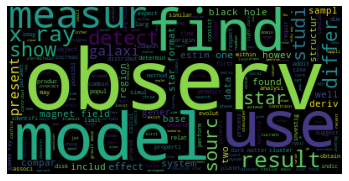

Wordcloud for category: cond-mat


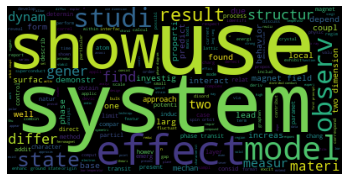

Wordcloud for category: hep-th


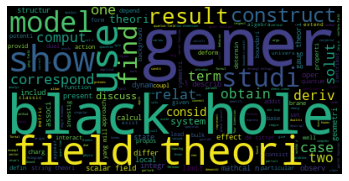

Wordcloud for category: quant-ph


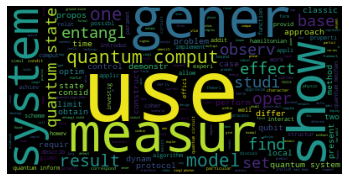

Wordcloud for category: stat


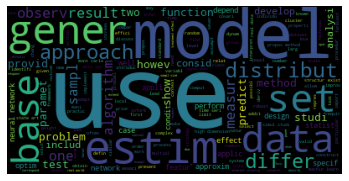

Wordcloud for category: eess


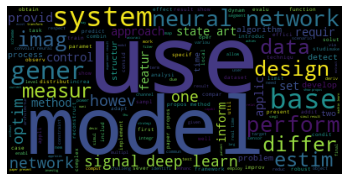

Wordcloud for category: math


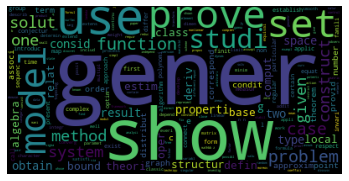

Wordcloud for category: physics


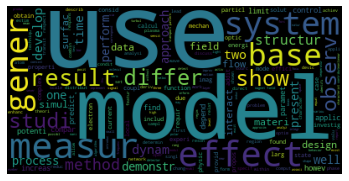

Wordcloud for category: cs


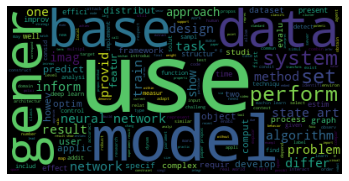

Wordcloud for category: hep-ph


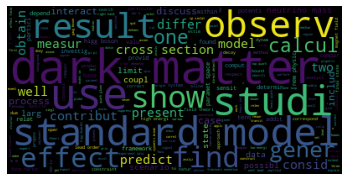

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_cloud(content):
    wordcloud = WordCloud().generate(" ".join(content))

    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

articles_categories = list(set(arxiv['label']))
print(articles_categories)

df_temp = pd.DataFrame(corpus, columns=['abstract_filtered'])

df_temp2 = pd.concat([arxiv, df_temp], axis=1)

# get abstract_filtered column values per category
for i in range(0, len(articles_categories)):
    values_per_label = df_temp2['abstract_filtered'][df_temp2['label'] == articles_categories[i]]
    print(f"Wordcloud for category: {articles_categories[i]}")
    create_word_cloud(values_per_label)